<a href="https://colab.research.google.com/github/PROACT-team/PROACT/blob/main/4_Kaplan_meier_estimation_on_each_target(Q3-2%EC%A0%90%2C%20full%20time).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
pip install lifelines

In [11]:
opt_target = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/본 실험/Optimal_target_with_92_Q3_2점.csv')
real_target = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/본 실험/Real_target_full_time.csv')

In [12]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [13]:
from lifelines.utils import median_survival_times

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)

AttributeError: ignored

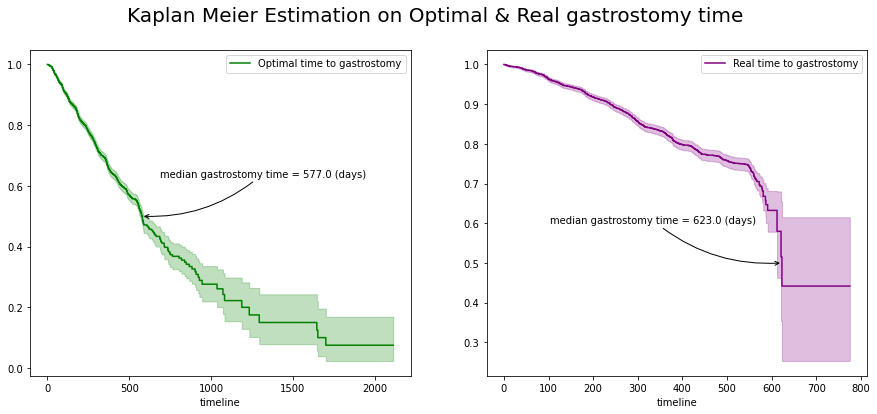

In [14]:
plt.figure(figsize=(15, 6))


plt.subplot(121)
OPT = kmf.fit(opt_target["time_opt"], opt_target["status_opt"], label='Optimal time to gastrostomy')
ax_kmf = OPT.plot(color='green')
plt.annotate("median gastrostomy time = "+str(OPT.median_survival_time_)+" (days)", xy=(float(OPT.median_survival_time_), 0.5)
                , xytext=(float(OPT.median_survival_time_)+110, 0.63), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2"))

plt.subplot(122)
REAL = kmf.fit(real_target['time_real'], real_target['status_real'], label='Real time to gastrostomy')
ax_kmf2 = REAL.plot(color='purple')
plt.annotate("median gastrostomy time = "+str(REAL.median_survival_time_)+" (days)", xy=(float(REAL.median_survival_time_), 0.5)
                , xytext=(float(REAL.median_survival_time_)-520, 0.6), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2"))

plt.suptitle('Kaplan Meier Estimation on Optimal & Real gastrostomy time', fontsize=20)
plt.show()